In [1]:
# XML読み込み
import xml.etree.ElementTree as ET

tree = ET.parse('./data/export.xml')
root = tree.getroot()

In [2]:
# 心拍６０ということかな？
root[1000].attrib

{'type': 'HKQuantityTypeIdentifierHeartRate',
 'sourceName': 'ShinyaさんのApple\xa0Watch',
 'sourceVersion': '7.1',
 'device': '<<HKDevice: 0x28274f980>, name:Apple Watch, manufacturer:Apple Inc., model:Watch, hardware:Watch6,1, software:7.1>',
 'unit': 'count/min',
 'creationDate': '2020-12-11 03:11:10 +0900',
 'startDate': '2020-12-11 03:05:21 +0900',
 'endDate': '2020-12-11 03:05:21 +0900',
 'value': '60'}

In [3]:
# https://developer.apple.com/documentation/healthkit/data_types
# 移動距離
dataType = "HKQuantityTypeIdentifierDistanceWalkingRunning"

In [4]:
start = []
end = []
value = []

for child in root:
    data = child.attrib

    try:
        if data['type'] == 'HKQuantityTypeIdentifierDistanceWalkingRunning':
            start.append(data['startDate'])
            end.append(data['endDate'])
            value.append(data['value'])
    except:
        pass

In [5]:
import pandas as pd
df = pd.DataFrame(
    {
        "startTime":start,
        "endTime":end,
        "distance":value
    }
)

In [6]:
df.shape

(39767, 3)

In [7]:
df.head()

,startTime,endTime,distance
0,2016-08-14 14:52:18 +0900,2016-08-14 14:56:43 +0900,0.0348
1,2016-08-14 15:20:48 +0900,2016-08-14 15:23:32 +0900,0.22068
2,2016-08-14 15:23:32 +0900,2016-08-14 15:28:32 +0900,0.04317
3,2016-08-14 15:28:32 +0900,2016-08-14 15:32:15 +0900,0.16946
4,2016-08-14 15:55:12 +0900,2016-08-14 15:55:17 +0900,0.00352


In [8]:
df.dtypes

startTime    object
endTime      object
distance     object
dtype: object

In [9]:
df['distance'] = df['distance'].astype(float)

In [10]:
df.to_csv("output.csv", index=False)

In [11]:
# https://upura.hatenablog.com/entry/2019/02/06/121500
df = pd.read_csv("output.csv", index_col="startTime")

In [12]:
df.index = pd.to_datetime(df.index, utc=True)

In [13]:
df.head()

,endTime,distance
startTime,,
2016-08-14 05:52:18+00:00,2016-08-14 14:56:43 +0900,0.03480
2016-08-14 06:20:48+00:00,2016-08-14 15:23:32 +0900,0.22068
2016-08-14 06:23:32+00:00,2016-08-14 15:28:32 +0900,0.04317
2016-08-14 06:28:32+00:00,2016-08-14 15:32:15 +0900,0.16946
2016-08-14 06:55:12+00:00,2016-08-14 15:55:17 +0900,0.00352


In [14]:
df['datetimeja'] = df.index.tz_convert('Asia/Tokyo')

In [15]:
df.head()

,endTime,distance,datetimeja
startTime,,,
2016-08-14 05:52:18+00:00,2016-08-14 14:56:43 +0900,0.03480,2016-08-14 14:52:18+09:00
2016-08-14 06:20:48+00:00,2016-08-14 15:23:32 +0900,0.22068,2016-08-14 15:20:48+09:00
2016-08-14 06:23:32+00:00,2016-08-14 15:28:32 +0900,0.04317,2016-08-14 15:23:32+09:00
2016-08-14 06:28:32+00:00,2016-08-14 15:32:15 +0900,0.16946,2016-08-14 15:28:32+09:00
2016-08-14 06:55:12+00:00,2016-08-14 15:55:17 +0900,0.00352,2016-08-14 15:55:12+09:00


In [16]:
# https://karaage.hatenadiary.jp/entry/2020/03/16/073000

df['date'] = df['datetimeja'].dt.date
df['time'] = df['datetimeja'].dt.time

daySummary = df.groupby(['date']).sum()

In [17]:
daySummary.head()

,distance
date,
2016-08-14,2.087309
2016-08-15,2.101447
2016-08-16,5.652700
2016-08-17,0.304540
2016-08-18,0.358260


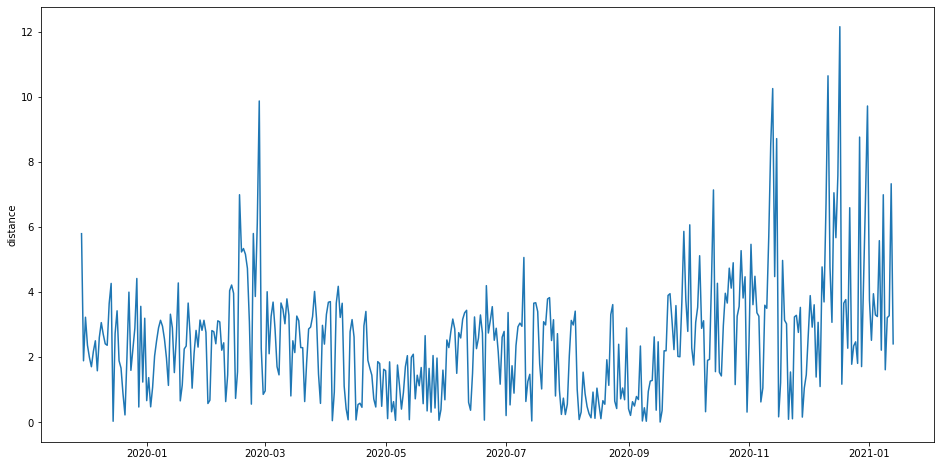

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
# plt.rcParams["font.size"] = 10
plt.ylabel('distance')
plt.plot(daySummary[1200:])